In [1]:
from genetic_algorithm.GA import GeneticAlgorithm as GA
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import functools

# Leer grafo

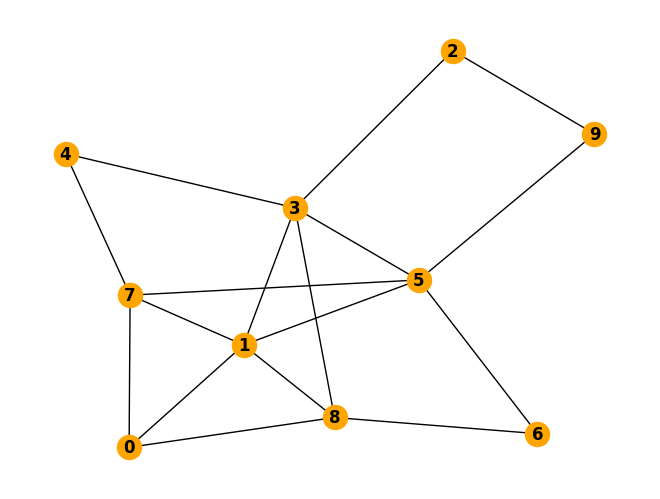

In [2]:
import csv
graph = []
with open('10nodos.csv', 'r', newline='') as file:
    myreader = csv.reader(file, delimiter=',')
    for row in myreader:
        # Convierte cada elemento de la fila en un entero
        int_row = [int(cell) for cell in row]
        graph.append(int_row)
graph = np.array(graph)
G = nx.from_numpy_array(graph)
nx.draw(G, with_labels=True, node_color='orange', font_weight='bold')
plt.show()

# Funcion de Costo

In [3]:

def graph_coloring(solucion, graph):
	"""graph_coloring Función Objetivo para el problema de Graph Coloring

	Parameters
	----------
	solucion : list[int]
		La solución a evaluar codificada de forma combinatoria. Es de tamaño neces
	graph : networkx.classes.graph.Graph
		Es la matriz de adyacencias del grafo a analizar

	Returns
	-------
	int
		Retorna el costo de la función
	"""
	ncolores=len(set(solucion))
	conflicts = 0
	for u, v in graph.edges():
		if solucion[u] == solucion[v]:
			conflicts += 1
	return conflicts + ncolores

fn = functools.partial(graph_coloring,graph =G)

# Experimento 1

In [4]:

parametros = {
    "stopping_criteria_type":"nochangebest",
    "max_nochange_best": 200,
    "population_size": 100,
    "selection_operator": "tournament",
    "crossover_operator": "onepoint",
    "mutation_operator":"swap",
    "problem_type": "COP",
    "limits":(0,10),
	"min_or_max": "min",
    "codification": "combination"
}

In [6]:
ga = GA(**parametros)

In [7]:
colors = ga.evolve(fn)

 Generations 203 | call_functions 20400 | Best: 4.00

Tiempo de ejecución: 00:00:00


 Generations 204 | call_functions 20400 | Best: 4.00 

4
[6 7 6 2 6 6 7 2 2 2]


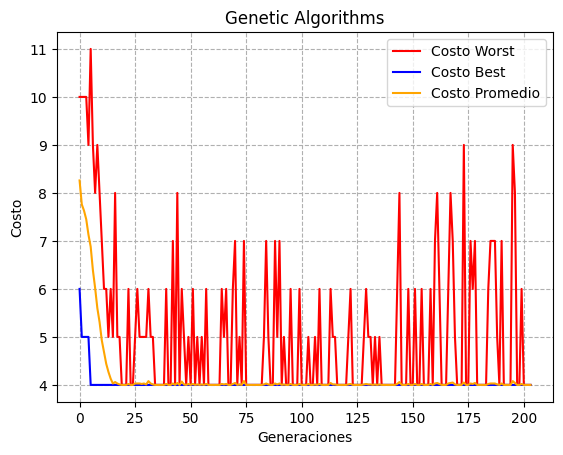

In [8]:
print(colors.fitness)
print(colors.genotype)

plt.plot(range(len(ga._cost_worst)), [x for x in ga._cost_worst ], color ='red', label ="Costo Worst")
plt.plot(range(len(ga._cost_best)), [x for x in ga._cost_best ], color ='blue', label ="Costo Best")
plt.plot(range(len(ga._cost_prom)), [x for x in ga._cost_prom ], color ='orange', label ="Costo Promedio")
plt.grid(True, linestyle='dashed')
plt.xlabel('Generaciones')
plt.ylabel('Costo')
plt.title('Genetic Algorithms')
plt.legend()
plt.show()
